In [1]:
import numpy as np
import pandas as pd

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framewo

In [3]:
dataset = pd.read_csv('C:/Users/lenovo/python_code/london_merged.csv')
dataset.head(22)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [4]:
dataset = dataset.iloc[:500,:]
dataset.head(20)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [5]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'],format = "%Y-%m-%d %H:%M")

In [6]:
dataset = dataset.set_index('timestamp')

In [7]:
dataset.head(10)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3
2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,0,1,3
2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4,0,1,3


In [8]:
from matplotlib import pyplot

In [9]:
values = dataset.values

In [10]:
groups = [0,1,2,3,4,5]
i =1

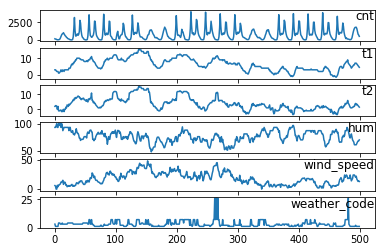

In [11]:
#plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups),1,i)
    pyplot.plot(values[:,group])
    pyplot.title(dataset.columns[group],y=0.5,loc="right")
    i = i +1
pyplot.show()

In [12]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
# load dataset
data = read_csv('C:/Users/lenovo/python_code/london_merged2.csv', header=0, index_col=0)
data.head(20)

,cnt,t1(T-1),t2(T-1),hum(T-1),wind_speed(T-1),weather_code(T-1),is_holiday(T-1),is_weekend(T-1),season(T-1)
timestamp,,,,,,,,,
2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3


In [14]:
values = data.values
values

array([[182. ,   3. ,   2. , ...,   0. ,   1. ,   3. ],
       [138. ,   3. ,   2.5, ...,   0. ,   1. ,   3. ],
       [134. ,   2.5,   2.5, ...,   0. ,   1. ,   3. ],
       ...,
       [337. ,   5.5,   1.5, ...,   0. ,   0. ,   3. ],
       [224. ,   5.5,   1.5, ...,   0. ,   0. ,   3. ],
       [139. ,   5. ,   1. , ...,   0. ,   0. ,   3. ]])

In [15]:
values = values.astype('float32')

In [16]:
#normalize features
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(values)

In [17]:
#frame as supervised learning
reframed = series_to_supervised(scaled,1,1)

In [18]:
#drop columns we do not want to predict
#reframed.drop(reframed.columns[[6,7,8]],axis=1,inplace = True)

In [19]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.023155   0.126761     0.2000   0.911950   0.106195       0.08   
2   0.017557   0.126761     0.2125   0.911950   0.088496       0.00   
3   0.017048   0.112676     0.2125   0.955975   0.000000       0.00   
4   0.009160   0.098592     0.2000   1.000000   0.000000       0.00   
5   0.005980   0.098592     0.1500   0.911950   0.115044       0.00   

   var7(t-1)  var8(t-1)  var9(t-1)   var1(t)   var2(t)  var3(t)   var4(t)  \
1        0.0        1.0        1.0  0.017557  0.126761   0.2125  0.911950   
2        0.0        1.0        1.0  0.017048  0.112676   0.2125  0.955975   
3        0.0        1.0        1.0  0.009160  0.098592   0.2000  1.000000   
4        0.0        1.0        1.0  0.005980  0.098592   0.1500  0.911950   
5        0.0        1.0        1.0  0.005852  0.098592   0.2000  0.911950   

    var5(t)  var6(t)  var7(t)  var8(t)  var9(t)  
1  0.088496      0.0      0.0      1.0      1.0  
2  0.00000

In [20]:
#Model Construction
values = reframed.values

In [21]:
train = values[:3545,:]
test = values[3545:,:]

In [22]:
train_x,train_y = train[:,1:],train[:,0]
test_x,test_y = test[:,1:],test[:,0]

In [23]:
#reshpe input to be 3D[samples,timesteps,features]
train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))

In [24]:
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

In [25]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(3545, 1, 17) (3545,) (13868, 1, 17) (13868,)


In [26]:
#design network
model = Sequential()
model.add(LSTM(170,input_shape = (train_x.shape[1],train_x.shape[2])))

In [27]:
model.add(Dense(1))
model.compile(loss='MSE',optimizer = 'adam')

In [28]:
#fit network
history = model.fit(train_x, train_y, epochs=50, batch_size=30, validation_data=(test_x,test_y), verbose=2, shuffle=False)

Train on 3545 samples, validate on 13868 samples
Epoch 1/50
 - 2s - loss: 0.0090 - val_loss: 0.0089
Epoch 2/50
 - 1s - loss: 0.0073 - val_loss: 0.0090
Epoch 3/50
 - 1s - loss: 0.0068 - val_loss: 0.0082
Epoch 4/50
 - 1s - loss: 0.0063 - val_loss: 0.0078
Epoch 5/50
 - 1s - loss: 0.0061 - val_loss: 0.0075
Epoch 6/50
 - 1s - loss: 0.0060 - val_loss: 0.0074
Epoch 7/50
 - 1s - loss: 0.0059 - val_loss: 0.0074
Epoch 8/50
 - 1s - loss: 0.0059 - val_loss: 0.0073
Epoch 9/50
 - 1s - loss: 0.0058 - val_loss: 0.0073
Epoch 10/50
 - 1s - loss: 0.0058 - val_loss: 0.0073
Epoch 11/50
 - 1s - loss: 0.0058 - val_loss: 0.0072
Epoch 12/50
 - 1s - loss: 0.0058 - val_loss: 0.0072
Epoch 13/50
 - 1s - loss: 0.0057 - val_loss: 0.0072
Epoch 14/50
 - 1s - loss: 0.0057 - val_loss: 0.0072
Epoch 15/50
 - 1s - loss: 0.0057 - val_loss: 0.0071
Epoch 16/50
 - 1s - loss: 0.0056 - val_loss: 0.0071
Epoch 17/50
 - 1s - loss: 0.0056 - val_loss: 0.0071
Epoch 18/50
 - 1s - loss: 0.0056 - val_loss: 0.0070
Epoch 19/50
 - 1s - loss

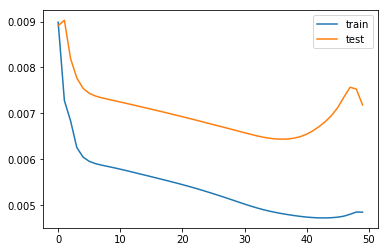

In [29]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [30]:
#make a prediction
yhat = model.predict(test_x)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[2])

In [31]:
yhat[:30]

array([[-0.00233444],
       [-0.01676762],
       [-0.01698987],
       [ 0.00231878],
       [ 0.09312587],
       [ 0.2613464 ],
       [ 0.3003461 ],
       [ 0.2568692 ],
       [ 0.10132561],
       [ 0.10366904],
       [ 0.17860773],
       [ 0.16070841],
       [ 0.11269184],
       [ 0.15065734],
       [ 0.21754722],
       [ 0.297015  ],
       [ 0.2804025 ],
       [ 0.2525466 ],
       [ 0.15345906],
       [ 0.08022679],
       [ 0.0260937 ],
       [ 0.02247295],
       [ 0.00107667],
       [-0.01743056],
       [-0.0143397 ],
       [-0.02370722],
       [-0.01821738],
       [ 0.01338917],
       [ 0.07999725],
       [ 0.22579172]], dtype=float32)

In [32]:
inv_yHat = concatenate((yhat, test_x), axis=1)   # array concatenation

In [33]:
test_y = test_y.reshape((len(test_y),1))

In [34]:
int_y = concatenate((test_y,test_x),axis =1)

In [35]:
from sklearn.metrics import mean_absolute_error,r2_score

In [36]:
mae = mean_absolute_error(int_y,inv_yHat)

In [37]:
print("MAE:%.3f"%mae)

MAE:0.003


In [38]:
r2 = r2_score(int_y,inv_yHat)

In [40]:
r2

0.9801033995865297